Setting up system

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from statsmodels.api import OLS

In [ ]:
url = "https://raw.githubusercontent.com/jsialell/predicting_wind_solar_power/master/data/combined.csv"
combined = pd.read_csv(url, parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
2014-01-01 00:00:00+00:00,36012,0.0,32425,8086.0,4.981596,0.0,0.0,0.0364,-1.146,0.0,0.0,0.0056,0.2378,0.9562,1.2539
2014-01-01 01:00:00+00:00,36012,0.0,32425,8803.0,4.932105,0.0,0.0,0.0449,-1.104,0.0,0.0,0.0074,0.2428,0.9672,1.2535
2014-01-01 02:00:00+00:00,36012,0.0,32425,8970.0,4.865019,0.0,0.0,0.0513,-1.059,0.0,0.0,0.0129,0.2521,0.9733,1.2530
2014-01-01 03:00:00+00:00,36012,0.0,32425,8510.0,4.842338,0.0,0.0,0.0544,-0.926,0.0,0.0,0.0140,0.2642,0.9651,1.2523
2014-01-01 04:00:00+00:00,36012,0.0,32425,8360.0,4.772505,0.0,0.0,0.0512,-0.746,0.0,0.0,0.0144,0.2764,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0098,-1.970,0.0,0.0,0.0017,0.0931,0.5102,1.2751
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0099,-2.130,0.0,0.0,0.0020,0.0944,0.5235,1.2756
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0093,-2.293,0.0,0.0,0.0020,0.0959,0.5248,1.2759
2016-12-31 22:00:00+00:00,40634,0.0,49021,15056.0,4.419977,0.0,0.0,0.0093,-2.443,0.0,0.0,0.0021,0.0973,0.5319,1.2760


**Note:** Below we are performing the solar power generation prediction using the linear regression

In [ ]:
solar = combined[['solar_generation_actual', 'solar_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_solar = solar[['solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_solar = solar['solar_generation_actual']

In [ ]:
# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master = X_solar.loc[(X_solar.index >= "2014-01-01 00:00:00") & (X_solar.index <= "2015-12-31 23:00:00")]
y_train = y_solar.loc[(X_solar.index >= "2014-01-01 00:00:00") & (X_solar.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master = X_solar.loc[(X_solar.index >= "2016-01-01 00:00:00") & (X_solar.index <= "2016-12-31 23:00:00")]
y_test = y_solar.loc[(X_solar.index >= "2016-01-01 00:00:00") & (X_solar.index <= "2016-12-31 23:00:00")]

**Note:** Below we will be performing training and validation considering all the features

In [ ]:
# We will use the linear regression model to predict the solar power generation
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.928
The R2 score of the LinearRegression model (test) is: 0.955


In [ ]:
pip install rfpimp

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10648 sha256=1361fede47b2adaed9254548173515760aad388cb96955be755548b7d8000d42
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


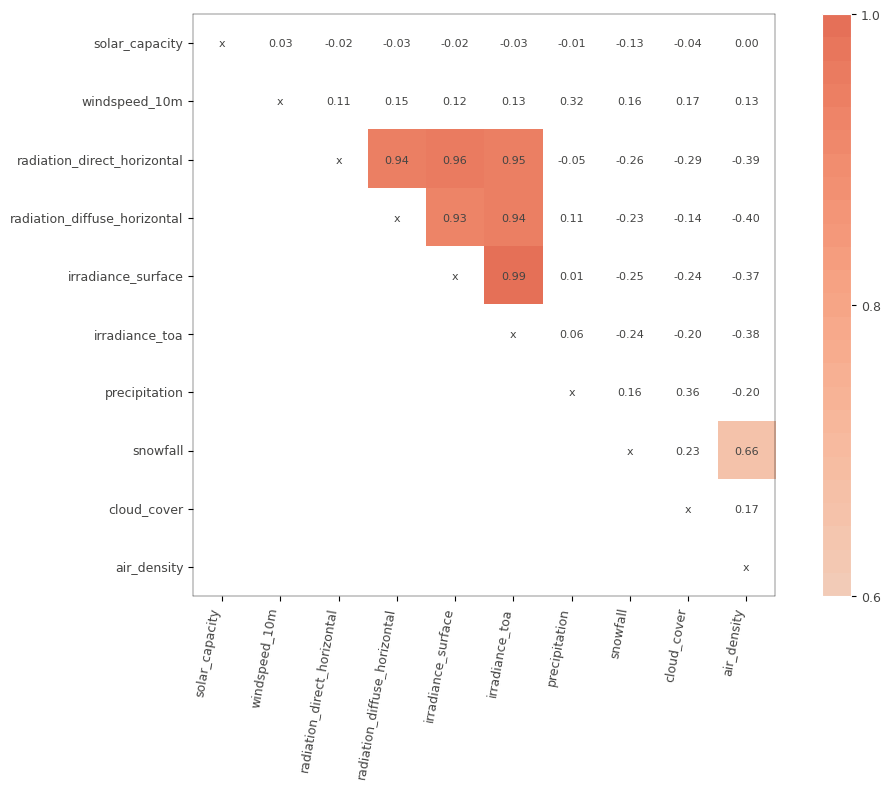

In [ ]:
# Let's check for multicollinearity amongst the different features
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

**Note:** We will be doing the training and validation part for the selected features now

In [ ]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.927
The R2 score of the LinearRegression model (test) is: 0.954


**Note:** One important observation we can draw here is that while dropping 3 features for solar radiation/irradiance, the goodness of fit of this model is no signicantly different than for the model with 10 features.

In [ ]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     solar_generation_actual   R-squared (uncentered):                   0.963
Model:                                 OLS   Adj. R-squared (uncentered):              0.963
Method:                      Least Squares   F-statistic:                          6.577e+04
Date:                     Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                             12:24:33   Log-Likelihood:                     -1.5088e+05
No. Observations:                    17503   AIC:                                  3.018e+05
Df Residuals:                        17496   BIC:                                  3.018e+05
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
solar_capacity         0.0453      0.008      5.485      0.000       0.029       0.061
windspeed_10m          6.4810      5.946      1.090      0.276      -5.174      18.136
irradiance_surface    26.0801      0.051    514.031      0.000      25.981      26.180
precipitation      -1959.3321     92.372    -21.211      0.000   -2140.391   -1778.273
snowfall             290.2266    463.142      0.627      0.531    -617.577    1198.030
cloud_cover          649.4022     49.045     13.241      0.000     553.269     745.536
air_density        -1664.3491    260.130     -6.398      0.000   -2174.229   -1154.469
==============================================================================
Omnibus:                     2806.682   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35913.975
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                       9.980   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note:** Now we will be performing training and validation by just considering one feature

In [ ]:
selected_features = ['irradiance_surface']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# First, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.932
The R2 score of the LinearRegression model (test) is: 0.953


**Note:** So far we have done the solar power generation prediction using the weather data, now we will be doing the wind power generation prediction below

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)  # X_train contains your features, y_train contains the solar power output

LinearRegression()

In [ ]:
# Predict solar power on training data
y_pred_train = lr.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred_train

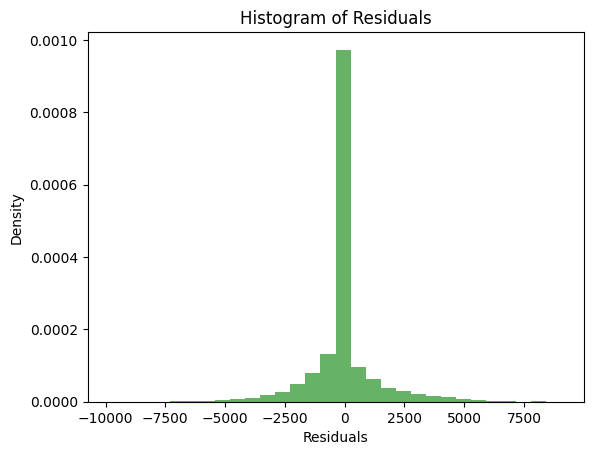

In [ ]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

AIC for Weibull distribution: 306573.94
AIC for Normal distribution: 302285.18
AIC for Gamma distribution: inf
The best-fit distribution is: Normal


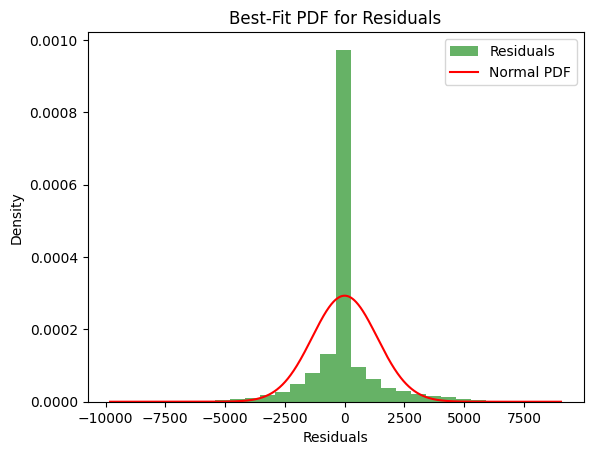

In [ ]:
from scipy.stats import weibull_min, norm, gamma
import numpy as np

# Function to calculate AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# Fit residuals to Weibull distribution
shape_weibull, loc_weibull, scale_weibull = weibull_min.fit(residuals)
log_likelihood_weibull = np.sum(weibull_min.logpdf(residuals, shape_weibull, loc=loc_weibull, scale=scale_weibull))
aic_weibull = calculate_aic(log_likelihood_weibull, num_params=3)  # Weibull has 3 parameters

# Fit residuals to Normal distribution
mu_normal, sigma_normal = norm.fit(residuals)
log_likelihood_normal = np.sum(norm.logpdf(residuals, loc=mu_normal, scale=sigma_normal))
aic_normal = calculate_aic(log_likelihood_normal, num_params=2)  # Normal has 2 parameters

# Fit residuals to Gamma distribution
shape_gamma, loc_gamma, scale_gamma = gamma.fit(residuals)
log_likelihood_gamma = np.sum(gamma.logpdf(residuals, shape_gamma, loc=loc_gamma, scale=scale_gamma))
aic_gamma = calculate_aic(log_likelihood_gamma, num_params=3)  # Gamma has 3 parameters

# Print AIC scores
print(f"AIC for Weibull distribution: {aic_weibull:.2f}")
print(f"AIC for Normal distribution: {aic_normal:.2f}")
print(f"AIC for Gamma distribution: {aic_gamma:.2f}")

# Determine the best-fit distribution based on AIC
aic_scores = {"Weibull": aic_weibull, "Normal": aic_normal, "Gamma": aic_gamma}
best_fit = min(aic_scores, key=aic_scores.get)
print(f"The best-fit distribution is: {best_fit}")

# Plot the PDF of the best-fit distribution
x = np.linspace(min(residuals), max(residuals), 1000)
if best_fit == "Weibull":
    pdf = weibull_min.pdf(x, shape_weibull, loc=loc_weibull, scale=scale_weibull)
elif best_fit == "Normal":
    pdf = norm.pdf(x, loc=mu_normal, scale=sigma_normal)
elif best_fit == "Gamma":
    pdf = gamma.pdf(x, shape_gamma, loc=loc_gamma, scale=scale_gamma)

plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label='Residuals')
plt.plot(x, pdf, label=f'{best_fit} PDF', color='red')
plt.title('Best-Fit PDF for Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# import numpy as np
# from scipy.stats import norm

# mu, sigma = norm.fit(residuals)

In [ ]:
# y_pred_new = lr.predict(X_test)  # X_new is the new data for which you want to predict solar power

In [ ]:
# from scipy.stats import norm

# solar_power_dist = norm(loc=y_pred_new, scale=sigma)

In [ ]:
# x_values = np.linspace(y_pred_new - 3*sigma, y_pred_new + 3*sigma, 100)
# pdf_values = solar_power_dist.pdf(x_values)

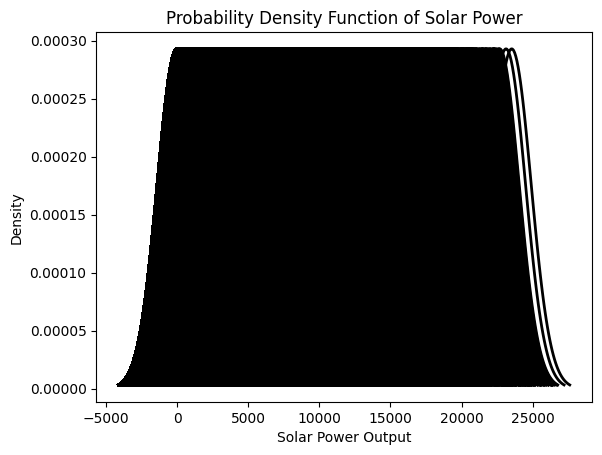

In [ ]:
# plt.plot(x_values, pdf_values, 'k', linewidth=2)
# plt.title('Probability Density Function of Solar Power')
# plt.xlabel('Solar Power Output')
# plt.ylabel('Density')
# plt.show()

Wind

In [ ]:
wind = combined[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_wind = wind[['wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_wind = wind['wind_generation_actual']

In [ ]:
# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master = X_wind.loc[(X_wind.index >= "2014-01-01 00:00:00") & (X_wind.index <= "2015-12-31 23:00:00")]
y_train = y_wind.loc[(X_wind.index >= "2014-01-01 00:00:00") & (X_wind.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master = X_wind.loc[(X_wind.index >= "2016-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]
y_test = y_wind.loc[(X_wind.index >= "2016-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]

**Note:** We will be doing training and validation of linear regression model considering all features below

In [ ]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.800
The R2 score of the LinearRegression model (test) is: 0.805


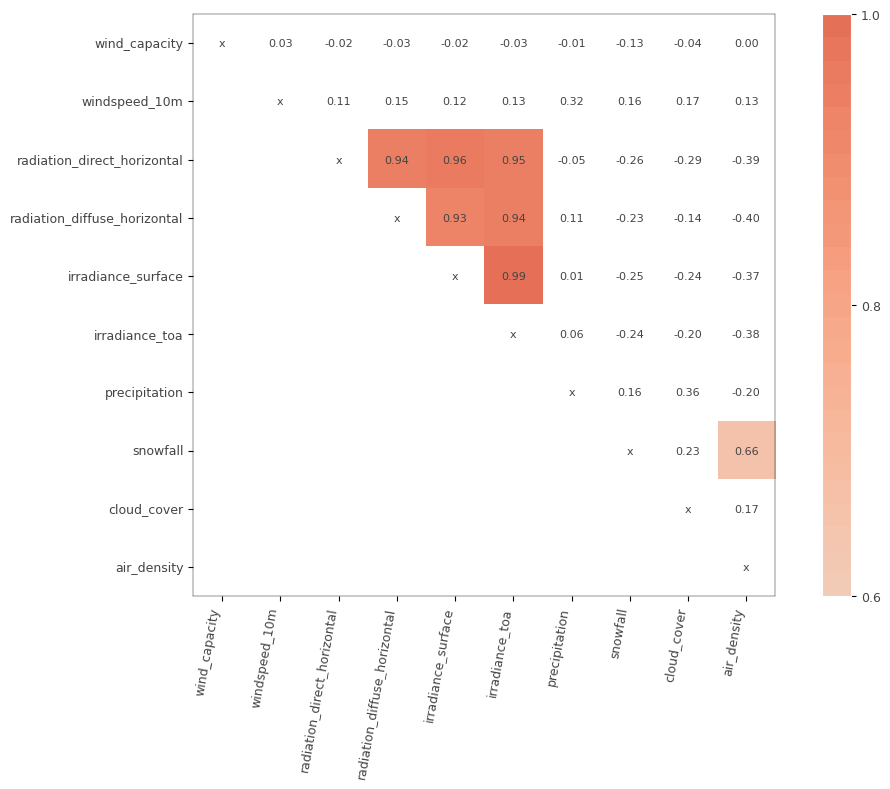

In [ ]:
# Let's check for multicollinearity amongst the different features
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

**Note**: we will be doing training and validation using the selected features below

In [ ]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.771
The R2 score of the LinearRegression model (test) is: 0.784


**Note:** Now we will be doing the training and validation of linear regression model considering only one feature

In [ ]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [ ]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.628
The R2 score of the LinearRegression model (test) is: 0.645


**Note:** A conclusion can be drawn from the above result that by using only the feature windspeed_10m, the LinearRegression model could not achieve a satisfying goodness of fit

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)  # X_train contains your features, y_train contains the solar power output

LinearRegression()

In [ ]:
# Predict solar power on training data
y_pred_train = lr.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred_train

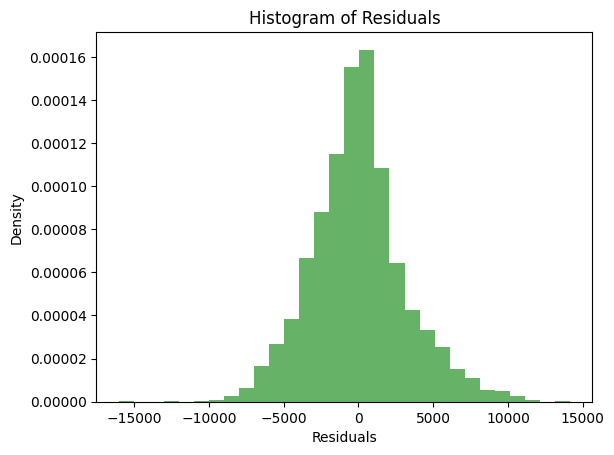

In [ ]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [ ]:
from scipy.stats import weibull_min, norm, gamma
import numpy as np

# Function to calculate AIC
def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# Fit residuals to Weibull distribution
shape_weibull, loc_weibull, scale_weibull = weibull_min.fit(residuals)
log_likelihood_weibull = np.sum(weibull_min.logpdf(residuals, shape_weibull, loc=loc_weibull, scale=scale_weibull))
aic_weibull = calculate_aic(log_likelihood_weibull, num_params=3)  # Weibull has 3 parameters

# Fit residuals to Normal distribution
mu_normal, sigma_normal = norm.fit(residuals)
log_likelihood_normal = np.sum(norm.logpdf(residuals, loc=mu_normal, scale=sigma_normal))
aic_normal = calculate_aic(log_likelihood_normal, num_params=2)  # Normal has 2 parameters

# Fit residuals to Gamma distribution
shape_gamma, loc_gamma, scale_gamma = gamma.fit(residuals)
log_likelihood_gamma = np.sum(gamma.logpdf(residuals, shape_gamma, loc=loc_gamma, scale=scale_gamma))
aic_gamma = calculate_aic(log_likelihood_gamma, num_params=3)  # Gamma has 3 parameters

# Print AIC scores
print(f"AIC for Weibull distribution: {aic_weibull:.2f}")
print(f"AIC for Normal distribution: {aic_normal:.2f}")
print(f"AIC for Gamma distribution: {aic_gamma:.2f}")

# Determine the best-fit distribution based on AIC
aic_scores = {"Weibull": aic_weibull, "Normal": aic_normal, "Gamma": aic_gamma}
best_fit = min(aic_scores, key=aic_scores.get)
print(f"The best-fit distribution is: {best_fit}")


AIC for Weibull distribution: 403214.02
AIC for Normal distribution: 331742.62
AIC for Gamma distribution: 331570.30
The best-fit distribution is: Gamma


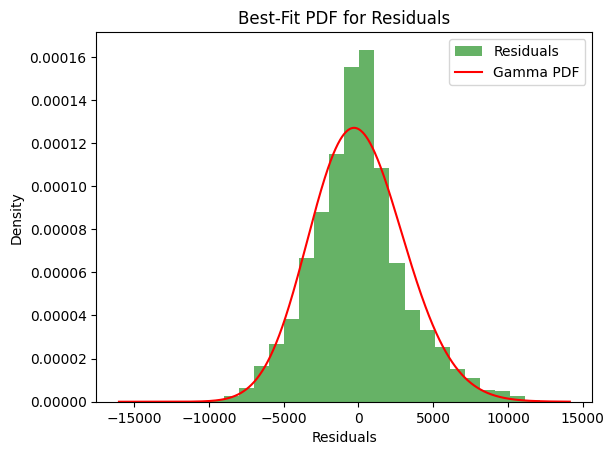

In [ ]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x = np.linspace(min(residuals), max(residuals), 1000)

# Compute the PDF of the best-fit distribution
if best_fit == "Weibull":
    pdf = weibull_min.pdf(x, shape_weibull, loc=loc_weibull, scale=scale_weibull)
elif best_fit == "Normal":
    pdf = norm.pdf(x, loc=mu_normal, scale=sigma_normal)
elif best_fit == "Gamma":
    pdf = gamma.pdf(x, shape_gamma, loc=loc_gamma, scale=scale_gamma)

# Plot the residuals histogram and the best-fit PDF
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label='Residuals')
plt.plot(x, pdf, label=f'{best_fit} PDF', color='red')
plt.title('Best-Fit PDF for Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# import numpy as np
# from scipy.stats import norm

# mu, sigma = norm.fit(residuals)

In [ ]:
# y_pred_new = lr.predict(X_test)  # X_new is the new data for which you want to predict solar power

In [ ]:
# from scipy.stats import norm

# wind_power_dist = norm(loc=y_pred_new, scale=sigma)

In [ ]:
# x_values = np.linspace(y_pred_new - 3*sigma, y_pred_new + 3*sigma, 100)
# pdf_values = wind_power_dist.pdf(x_values)

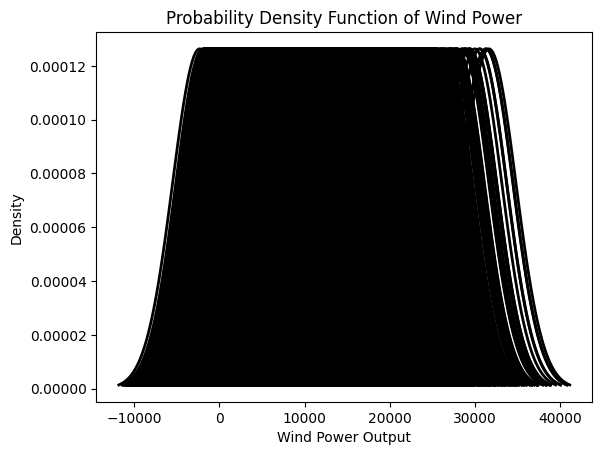

In [ ]:
# plt.plot(x_values, pdf_values, 'k', linewidth=2)
# plt.title('Probability Density Function of Wind Power')
# plt.xlabel('Wind Power Output')
# plt.ylabel('Density')
# plt.show()